***Course : IE-406 Machine Learning***

***Group: 16***

***Group Members:***

***Ravi Patel - 201801046***

***Ayan Khokhar - 201801057***

***Prakhar Maheshwari - 201801432***

***Jaydeep Machhi - 201801452***

***Aakash Panchal - 201801459***


***Question 1: Implement polynomial regression as a special case of linear regression. First generate
some data as follows.***

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Data Generation
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + np.random.randn(len(x))*1e5
#Printing the first 10 values only
print('X = ', x[:10])
print('Y = ', y[:10])

X =  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
Y =  [  76405.23459677  -60014.29885328   -2186.67646943  123997.36665015
   86630.766055   -197888.06923764   -5189.41168744 -115375.21245977
 -110606.40869936  -59274.01101616]


***We can use the linear regression implementations for doing so, by transforming the
dataset and creating the matrix X containing columns corresponding to x0, x1, x2, ..., xp.
Using any of your implementations above learn the regression coefficients for p = 5
and p = 4. How close are your coefficients for p = 5 to the ones used to generate the
data?***

In [ ]:
#For p = 4 degree polynomial
newX = []
mul = 1
for i in range(0, 5):
    mul = mul * x
    newX.append(mul)

newX = np.array(newX)
newX = newX.T
# print((newX.shape))
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

print(f'Regression Coefficients = {reg.coef_}')
print(f'Regression Intercept {reg.intercept_}')
print(f'Regression Score = {reg.score(X_test, y_test)}')
predicted_y = reg.predict(newX)
mse = mean_squared_error(y, predicted_y, squared = False)
# print(predicted_y)
print(f'Root Mean Squared Error = {mse}')

Regression Coefficients = [-9.13511917e+04  1.36268352e+04 -4.14618192e+02 -3.36189972e+01
  2.45206708e+00]
Regression Intercept 30933.713570617023
Regression Score = 0.9782024578345158
Root Mean Squared Error = 97021.26616028769


In [ ]:
#For p = 5 degree polynomial
newX = []
mul = 1
for i in range(0, 6):
    mul = mul * x
    newX.append(mul)

newX = np.array(newX)
newX = newX.T
# print((newX.shape))
X_train, X_test, y_train, y_test = train_test_split(newX, y, test_size=0.33, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

print(f'Regression Coefficients = {reg.coef_}')
print(f'Regression Intercept {reg.intercept_}')
print(f'Regression Score = {reg.score(X_test, y_test)}')
predicted_y = reg.predict(newX)
mse = mean_squared_error(y, predicted_y, squared = False)
# print(predicted_y)
print(f'Root Mean Squared Error = {mse}')

Regression Coefficients = [-1.39455103e+05  3.85506445e+04 -5.46473224e+03  4.42682862e+02
 -1.85689676e+01  3.50879604e-01]
Regression Intercept 50134.468212532636
Regression Score = 0.9776815417322802
Root Mean Squared Error = 97213.15953592927


***Question 2: Find minima of following functions using Gradient
Descent method with learning rate 0.01 and 0.1 and
different number of iterations. Try choosing a large value
of learning rate and test the convergence. For L5(θ), use
the data file***

In [ ]:
#Helper Functions for Gradient Descent Method

def gradient_descent_iterative(gradient_func, start, alpha, iterations = 1e8, err = 1e-09):
  # Initialize the xn with start values 
  xn = start

  # Loop until the iterations get finished
  for i in range(int(iterations)):
    # Calculate the gradient function 
    xnew = - alpha * gradient_func(xn)

    # Check that the convergence is achieved
    if np.abs(xnew) <= err:
      break
    xn += xnew

  return xn

def gradient_descent_iterative_two_var(gradient_func, start, alpha, iterations = 1e8, err = 1e-09):
  # Initialize the xn with start values 
  xn = start

  # Loop until the iterations get finished
  for i in range(int(iterations)):
    # Calculate the gradient function 
    xnew = - alpha * np.array(gradient_func(xn))


    # Check that the convergence is achieved
    if np.all(np.abs(xnew) <= err):
      break
    xn += xnew

  return xn


2(a)

In [ ]:
alpha = 0.1 # Learning Rate 
gradient_func = lambda theta: 2*theta
func = lambda theta: theta*theta
ans = gradient_descent_iterative(gradient_func, 5, alpha)
print(f'θ = {ans}')
print(f'L(θ) = {func(ans)}')


θ = 4.856672230564326e-09
L(θ) = 2.3587265155134666e-17


In [ ]:
alpha = 0.01 # Learning Rate 
gradient_func = lambda theta: 2*theta
func = lambda theta: theta*theta
ans = gradient_descent_iterative(gradient_func, 5, alpha)
print(f'θ = {ans}')
print(f'L(θ) = {func(ans)}')


θ = 4.979102145973068e-08
L(θ) = 2.479145818003361e-15


2(b)

In [ ]:
alpha = 0.01 # Learning Rate 

def my_func(theta):
  return [2 * theta[0], 2 * theta[1]]

def func(theta):
  return theta[0] * theta[0] + theta[1] * theta[1]

ans = gradient_descent_iterative_two_var(my_func, [5, 5], alpha)
print(f'θ1 = {ans[0]} and θ2 = {ans[1]}')
print(f'Minima value of L(θ) = {func(ans)}')


θ1 = 4.979102145973068e-08 and θ2 = 4.979102145973068e-08
Minima value of L(θ) = 4.958291636006722e-15


In [ ]:
alpha = 0.1 # Learning Rate 

def my_func(theta):
  return [2 * theta[0], 2 * theta[1]]

def func(theta):
  return theta[0] * theta[0] + theta[1] * theta[1]

ans = gradient_descent_iterative_two_var(my_func, [5, 5], alpha)
# print(ans)

print(f'θ1 = {ans[0]} and θ2 = {ans[1]}')
print(f'Minima value of L(θ) = {func(ans)}')


θ1 = 4.856672230564326e-09 and θ2 = 4.856672230564326e-09
Minima value of L(θ) = 4.717453031026933e-17


2(c)

In [ ]:
alpha = 0.01 # Learning Rate 

def my_func(theta):
  return 2 * (theta - 1)

def func(theta):
  return (theta - 1) ** 2
ans = gradient_descent_iterative(my_func, 5, alpha)
print(f'θ = {ans}')
print(f'Minima value of L(θ) = {func(ans)}')

θ = 1.0000000497455448
Minima value of L(θ) = 2.474619226904864e-15


In [ ]:
alpha = 0.1 # Learning Rate 

def my_func(theta):
  return 2 * (theta - 1)

def func(theta):
  return (theta - 1) ** 2

ans = gradient_descent_iterative(my_func, 5, alpha)
# print(ans)
print(f'θ = {ans}')
print(f'Minima value of L(θ) = {func(ans)}')


θ = 1.0000000048566722
Minima value of L(θ) = 2.3587264620615693e-17


2(d)

In [ ]:
alpha = 0.01 # Learning Rate 

def my_func(theta):
  return [4 * (theta[0] - 1), 4 * (theta[1] - 1)] 

ans = gradient_descent_iterative_two_var(my_func, [5,5], alpha)
# print(ans)

def func(theta):
  return  (2* (theta[0] - 1) * (theta[0] - 1)) + (2* (theta[1] - 1) * (theta[1] - 1))

print(f'θ1 = {ans[0]} and θ2 = {ans[1]}')
print(f'Minima value of L(θ) = {func(ans)}')


θ1 = 1.0000000247537435 and θ2 = 1.0000000247537435
Minima value of L(θ) = 2.450991268939751e-15


In [ ]:
alpha = 0.1 # Learning Rate 

def my_func(theta):
  return [4 * (theta[0] - 1), 4 * (theta[1] - 1)] 

ans = gradient_descent_iterative_two_var(my_func, [5,5], alpha)
# print(ans)

def func(theta):
  return  (2* (theta[0] - 1) * (theta[0] - 1)) + (2* (theta[1] - 1) * (theta[1] - 1))

print(f'θ1 = {ans[0]} and θ2 = {ans[1]}')
print(f'Minima value of L(θ) = {func(ans)}')


θ1 = 1.0000000019249191 and θ2 = 1.0000000019249191
Minima value of L(θ) = 1.4821254366284845e-17


2(e) Least Square Function

In [2]:
#First we read the data 
df = pd.read_excel('/content/data.xlsx')
df

,x,y
0,3504,18.0
1,3693,15.0
2,3436,18.0
3,3433,16.0
4,3449,17.0
...,...,...
89,2790,27.0
90,2130,44.0
91,2295,32.0
92,2625,28.0


In [3]:
x = df['x']
y = df['y']
x = np.array(x)
x = x - np.mean(x)
x = x/np.std(x)
y = np.array(y)
print(x, y)

[ 0.67812404  0.91514992  0.59284489  0.58908257  0.60914825  1.7278101
  1.74411347  1.69144105  1.83315494  1.11204444  0.75211625  0.80980509
  1.00042908  0.15390806 -0.74152306 -0.16338056 -0.23737277 -0.47189044
 -1.04501652 -1.41497756 -0.3652915  -0.66878496 -0.73776075 -0.91458958
 -0.39539002  2.07143493  1.77170378  1.77922842  2.21816524 -0.62614538
 -0.93214705 -0.49070202 -0.88825337 -0.95472095  1.56979285  1.53844022
  1.25250423  1.56979285  0.33826153  0.48875415  0.06110428  0.15265396
 -1.16415652 -1.00237694 -1.28705883 -1.46514177  0.86247751  0.7659114
  0.85495287  0.28809732 -1.42751861 -1.22059125 -1.01366389 -0.49948075
  0.23417079  1.22491391  0.38466342 -0.04173235  1.07442129  1.77672021
  1.36913601  1.13712655  0.99290445 -0.44931655 -0.40542286 -0.71267864
 -0.4869397  -0.54964496 -0.28628287 -0.12324919  0.0899487  -1.2331323
 -1.17669757 -1.24567336 -1.05128705 -1.05128705 -1.00739337 -0.95095863
 -0.90079442 -1.25194388 -1.25194388 -1.21432073 -0.02

In [ ]:
def gradient_descent_iterative_5(gradient_func, params, start, alpha, iterations = 5000, err = 1e-06):
  xn = start
  x = params[0]
  y = params[1]

  for i in range(int(iterations)):
    xnew = - alpha * np.array(gradient_func(xn, x, y))
    if np.all(np.abs(xnew) <= err):
      break
    xn += xnew

  return xn

def lsgradient(theta, x, y):
  val = theta[0] + theta[1] * x - y
  val = val * 2
  return [val.sum(), (val*x).sum()]

In [ ]:
alpha = 0.01
ans = gradient_descent_iterative_5(lsgradient, [x,y], [-5,-5], alpha)
print(f'θ1 = {ans[0]} and θ2 = {ans[1]}')
def func(theta, x, y):
  return np.sum((y - (theta[0] + theta[1] * x)) ** 2)

print(f'Minima value of L(θ) = {func(ans, x, y)}')

θ1 = 23.718084621396557 and θ2 = -6.86699541572586
Minima value of L(θ) = 1572.6503668923142


In [ ]:
alpha = 0.1
ans = gradient_descent_iterative_5(lsgradient, [x,y], [-5,-5], alpha, 1)
print(f'θ1 = {ans[0]} and θ2 = {ans[1]}')
def func(theta, x, y):
  return np.sum((y - (theta[0] + theta[1] * x)) ** 2)

print(f'Minima value of L(θ) = {func(ans, x, y)}')

θ1 = 534.9 and θ2 = -40.0995144084012
Minima value of L(θ) = 24668239.59086284


***Question 3: Find minimum of the function $L(\theta) = \sum_{i=1}^{m} \left(y^{(i)} - ({\theta}_0 + {\theta}_1 \cdot x^{(i)}) \right)^2 $ using the
Stochastic Gradient Descent method (Take the data from the data file). Choose
different learning rates and number of iterations.***

In [4]:
def stochastic_gradient_descent(gradient_func, params, start, alpha, batch_size = 1, iterations = 5000, err = 1e-06):

  # float data type in numpy format 
  dataType = np.dtype('float64')

  x = np.array(params[0], dtype = dataType)
  y = np.array(params[1], dtype = dataType)

  n = x.shape[0]
  if(y.shape[0] != n) : 
    raise ValueError("'X' and 'Y' must have same length")

  xy = np.c_[x.reshape(n, -1), y.reshape(n, 1)]

  data = np.array(start, dtype = dataType)

  rng = np.random.default_rng(seed=31032000)

  alpha = np.array(alpha, dtype = dataType)

  if not 0 < batch_size <= n : 
    raise ValueError("Batch size must lie between 1 and 'Number of Observations'")

  for itr in range(iterations) : 
    rng.shuffle(xy)

    for start in range(0, n, batch_size) : 
      stop = start + batch_size 
      currX, currY = xy[start:stop, :-1], xy[start:stop, -1:]  
      currGrad = np.array(gradient_func(data, currX, currY), dataType)
      currError = -alpha * currGrad

      if (np.all(currError) <= err) : 
        break

      data += currError

  return data

def lsgradient(theta, x, y):
  val = theta[0] + theta[1] * x - y
  val = val * 2
  return [val.sum(), (val*x).sum()]

In [5]:
alpha = 0.01

ans = stochastic_gradient_descent(lsgradient, [x,y], [5,5], alpha, 25, 5000)
print(ans)
def func(theta, x, y):
  return np.sum((y - (theta[0] + theta[1] * x)) ** 2)

print(f'Minima value of L(θ) = {func(ans, x, y)}')

[23.65233444 -6.69984829]
Minima value of L(θ) = 1575.6829311649976


In [10]:
alpha = 0.1

ans = stochastic_gradient_descent(lsgradient, [x,y], [5,5], alpha, 25, 1)
print(ans)
def func(theta, x, y):
  return np.sum((y - (theta[0] + theta[1] * x)) ** 2)

print(f'Minima value of L(θ) = {func(ans, x, y)}')

[-3564.66405431  1678.69815446]
Minima value of L(θ) = 1477457500.433954


***Question 4: Find the minima of following functions using the Steepest Descent method.***

In [ ]:
import sympy as syp
def steepest_gradient_descent_one_parameter(iterations, L):
    optimum_theta = 10
    optimum_alpha = 0.1

    dL_dtheta = syp.diff(L, theta)

    alpha = syp.symbols('a')
    L_alpha = L.subs(theta, theta - (alpha * dL_dtheta))
    L_alpha_d1 = syp.diff(L_alpha, alpha)
    L_alpha_d2 = syp.diff(L_alpha_d1, alpha)
    ratio = L_alpha_d1 / L_alpha_d2

    for i in range(iterations):
        for j in range(iterations):
            optimum_alpha = optimum_alpha - ratio.subs({alpha: optimum_alpha, theta: optimum_theta})
        optimum_theta = optimum_theta - optimum_alpha * dL_dtheta.subs(theta, optimum_theta)
    print('Optial value of theta : ', optimum_theta)
    print('Minimum value of L(theta) : ', L.subs(theta, optimum_theta))

**Question 4a**

In [ ]:
theta = syp.symbols('theta')
steepest_gradient_descent_one_parameter(25, np.square(theta))

Optial value of theta :  0
Minimum value of L(theta) :  0


In [ ]:
def steepest_gradient_descent_two_parameter(iterations, L):
    optimum_theta0 = 10
    optimum_theta1 = 10
    optimum_alpha = 0.1
    
    dL_dtheta0 = syp.diff(L, theta0)
    dL_dtheta1 = syp.diff(L, theta1)
    
    alpha = syp.symbols('a')
    L_alpha = L.subs({theta0 : theta0 - (alpha * dL_dtheta0), theta1 : theta1 - (alpha * dL_dtheta1)})
    L_alpha_d1 = syp.diff(L_alpha, alpha)
    L_alpha_d2 = syp.diff(L_alpha_d1, alpha)
    ratio = L_alpha_d1 / L_alpha_d2

    for i in range(iterations):
        for j in range(iterations):
            optimum_alpha = optimum_alpha - ratio.subs({alpha : optimum_alpha, theta0 : optimum_theta0, theta1 : optimum_theta1})
        optimum_theta0 = optimum_theta0 - optimum_alpha * dL_dtheta0.subs({theta0 : optimum_theta0, theta1 : optimum_theta1})
        optimum_theta1 = optimum_theta1 - optimum_alpha * dL_dtheta1.subs({theta0 : optimum_theta0, theta1 : optimum_theta1})
    print('Optimal value of theta0: ', optimum_theta0)
    print('Optimal value of theta1: ', optimum_theta1)
    print('Minimum value of L(theta0, theta1): ', L.subs({theta0 : optimum_theta0, theta1 : optimum_theta1}))

**Question 4b**

In [ ]:
theta0 = syp.symbols('theta0')
theta1 = syp.symbols('theta1')
steepest_gradient_descent_two_parameter(25, np.square(theta0) + np.square(theta1))

Optimal value of theta0:  0
Optimal value of theta1:  0
Minimum value of L(theta0, theta1):  0


**Question 4c**

In [ ]:
theta = syp.symbols('theta')
steepest_gradient_descent_one_parameter(25, np.square(theta - 1))

Optial value of theta :  1.00000000000000
Minimum value of L(theta) :  0


**Question 4d**

In [ ]:
theta0 = syp.symbols('theta0')
theta1 = syp.symbols('theta1')
L = 2 * np.square(theta0 - 1) + 2 * np.square(theta1 - 1)
steepest_gradient_descent_two_parameter(25, L)

Optimal value of theta0:  1.00000000000000
Optimal value of theta1:  1.00000000000000
Minimum value of L(theta0, theta1):  0


**Question 4e**

In [ ]:
location = r"/content/data.xlsx"
df = pd.read_excel(location)

x = np.array(df['x'])
x = x - np.mean(x)
x = x / np.std(x)

y = np.array(df['y'])

theta0 = syp.symbols('theta0')
theta1 = syp.symbols('theta1')
L = np.sum((y - (theta0 + theta1 * x)) ** 2)
steepest_gradient_descent_two_parameter(4, L)

Optimal value of theta0:  23.7873552232581
Optimal value of theta1:  -6.88576009845154
Minimum value of L(theta0, theta1):  1573.13451024758


***Question 5: The following question is to aid your understanding of gradient descent with the help of
some visualization. Consider the data X and Y as given below.***

***5a: Create a contour plot in the $θ_0$ and $θ_1$ space of residual sum of squares.***

In [ ]:
import matplotlib.animation as ani
from matplotlib import  pyplot as plt
from mpl_toolkits import mplot3d
X = np.array([1,3,6])
Y = np.array([6,10,16])
print(f'X = {X}')
print(f'Y = {Y}')

X = [1 3 6]
Y = [ 6 10 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0.5, 0, 'L($θ$)')

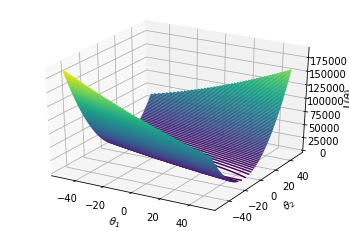

In [ ]:
start = -50
stop = 50
step = 0.1
theta0 = np.arange(start, stop, step)
theta1 = np.arange(start, stop, step)

new_theta = np.meshgrid(theta0, theta1)
new_theta = np.array(new_theta)

Ltheta = 0

# Residual Calculation
for i in range(len(X)):
  Ltheta = Ltheta + (Y[i] - (new_theta[0] + new_theta[1] * X[i])) ** 2

fig=plt.figure()
ax =plt.axes(projection = '3d')

ax.contour3D(new_theta[0], new_theta[1], Ltheta, 100)
ax.set_xlabel('$θ_1$')
ax.set_ylabel('$θ_2$')
ax.set_zlabel('L($θ$)')

***5(b):Create a Matplotlib animation where the plot contains two columns: the first one being
the contour plot and the second one being the linear regression fit on the data. The
different frames in the animation correspond to different iterations of gradient descent
applied on the dataset to learn $θ_0$ and $θ_1$. For each iteration, draw the current value of
$q_0$ and $q_1$ on the contour plot and also an arrow to the next $q_0$  and  $q_1$ as learnt by gradient
update rule. Correspondingly draw the y = $θ_0$ + $θ_1$ × x line on the other subplot showing
the scatter plot. The overall title of the plot shows the iteration number and the residual
sum of squares. You are free to use any gradient descent implementation i.e. your own
or using libraries like scikit learn.***

In [ ]:
# Gradient Descent Helper function
def gradient_descent_iterative_with_plotting(gradient_func, params, start, alpha, iterations = 5000, err = 1e-06):
  xn = start
  x = params[0]
  y = params[1]
  figname = '1'
  for i in range(int(iterations)):
    # if i < 10:
    if i < 100:
      plot_function(xn, i, figname)
    figname += '1'
    # if i > 300 and i < 305:
      # plot_function(xn, i)

    xnew = - alpha * np.array(gradient_func(xn, x, y))
    if np.all(np.abs(xnew) <= err):
      # print(i)
      break
    xn += xnew
  return xn

# Declaring Gradient Function of L(theta)
def lsgradient(theta, x, y):
  val = theta[0] + theta[1] * x - y
  return [val.mean(), (val*x).mean()]

def func(theta, x, y):
  return np.sum((y - (theta[0] + theta[1] * x)) ** 2)


def plot_function(params, iteration_number, figname):
  step = 0.1
  start = -10
  end = 10
  x_axis_1 = np.arange(start,end,step)
  y_axis_1 = np.arange(start,end,step)
  x_axis_2 = np.arange(start,end,step)
  y_axis_2 = params[0] + params[1] * x_axis_2
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(6,4))
  fig.suptitle(f'Iteration Number_{iteration_number}')
  new_theta = np.meshgrid(x_axis_1, y_axis_1)
  
  Ltheta = 0

  for i in range(len(X)):
    Ltheta = Ltheta + (Y[i] - (new_theta[0] + new_theta[1] * X[i])) ** 2
  # plt.figure(2)
  ax1.contour(new_theta[0], new_theta[1], Ltheta)
  ax1.plot(params[0],params[1], 'o')
  ax1.annotate('Theta', (params[0], params[1]))
  ax1.arrow(params[0], params[1], (4-params[0]), (2-params[1]), length_includes_head = True)
  ax2.plot(x_axis_2, y_axis_2)
  ax2.scatter(X, Y)
  plt.savefig(f'Iteration_{figname}');
  plt.clf()
  plt.show()


# Learning Rate 
alpha = 0.1

ans = gradient_descent_iterative_with_plotting(lsgradient, [X, Y], [5,5], alpha)
print(f'θ0 = {ans[0]} and θ1 = {ans[1]} ')
print(f'L(θ) = {func(ans, X, Y)}')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

θ0 = 4.000037570376705 and θ1 = 1.9999916901412398 
L(θ) = 1.1669817578009631e-09


In [ ]:
from PIL import Image
import glob

import imageio
image_list = []
for filename in glob.glob('/content/*.png'): #assuming gif
    # im=Image.open(filename)
    # print(filename)
    image_list.append(filename)
  
images = []
image_list.sort()

# filenames = '/content/'
for filename in image_list:
  # print('T')
    print(filename)
    images.append(imageio.imread(filename))
imageio.mimsave('movie.mp4', images)

/content/Iteration_1.png
/content/Iteration_11.png
/content/Iteration_111.png
/content/Iteration_1111.png
/content/Iteration_11111.png
/content/Iteration_111111.png
/content/Iteration_1111111.png
/content/Iteration_11111111.png
/content/Iteration_111111111.png
/content/Iteration_1111111111.png
/content/Iteration_11111111111.png
/content/Iteration_111111111111.png
/content/Iteration_1111111111111.png
/content/Iteration_11111111111111.png
/content/Iteration_111111111111111.png
/content/Iteration_1111111111111111.png
/content/Iteration_11111111111111111.png
/content/Iteration_111111111111111111.png
/content/Iteration_1111111111111111111.png
/content/Iteration_11111111111111111111.png
/content/Iteration_111111111111111111111.png
/content/Iteration_1111111111111111111111.png
/content/Iteration_11111111111111111111111.png
/content/Iteration_111111111111111111111111.png
/content/Iteration_1111111111111111111111111.png
/content/Iteration_11111111111111111111111111.png
/content/Iteration_111111